<a href="https://colab.research.google.com/github/sakamototaisei/python_colab/blob/main/PyTorch%E3%81%A7%E5%AE%9F%E8%A3%85%E3%81%99%E3%82%8B%E3%83%87%E3%82%A3%E3%83%BC%E3%83%97%E3%83%A9%E3%83%BC%E3%83%8B%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **イントロダクション**

## **ディープラーニングとは**

**人工ニューロン**

*   ニューロンへの入力に重みをかけた値を統ベて足し合わせて、バイアスを加える
*   重みはシナプスの伝達効率
*   バイアスはニューロンの感度
*   上記の値を活性化関数で処理し出力とする
*   活性化関数は、値を信号に変換する関数



**人工ニューラルネットワーク**

*   ニューロンを層状に並べたもの
*   数値を入力し、情報を伝播させ結果を出力する
*   出力は確率などの予測値として解釈可能で、ネットワークにより予測を行うことが可能
*   ニューロンや層の数を増やすことによって、高い表現力を発揮するようになる



**バックプロパゲーションによる学習**

*   ニューラルネットワークは、出力と正解の誤差が小さくなる様に重みとバイアスを調整することで学習することができる
*   一層ずつ遡るように誤差を伝播させて重みとバイアスを更新するが、このアルゴリズムは、バックプロパゲーション(誤差逆伝播報)と呼ばれる



**ディープラーニングとは**

*   多数の層からなるニューラルネットワークの学習のことを、ディープラーニング(深層学習)と呼ぶ
*   ヒトの知能に部分的に迫る高い性能をしばしば発揮する



## **PyTorchとは**



*   Define by Run方式を採用し、データを流しながらネットワークの定義と演算を行う
*   Numpyと類似した操作のTensorクラスによりデータを扱う



**各モジュール**


*   autograd：Tensorの各要素による微分を自動で行う機能
*   optim：様々な最適化アルゴリズムを実装したモジュール
*   nn：モデルを構築するためによく使われている層を集めたモジュール



## **Tensorについて**

In [ ]:
!pip list

In [ ]:
import torch

a = torch.tensor([1, 2, 3])
print(a, type(a))

tensor([1, 2, 3]) <class 'torch.Tensor'>


In [ ]:
# 2中のリストから生成
b = torch.tensor([[1, 2],
                  [3, 4]])
print(b)

# dtypeを指定し、倍精度のTensorにする
c = torch.tensor([[1, 2],
                  [3, 4]], dtype=torch.float64)
print(c)

# 0から9までの数値で初期化
d = torch.arange(0, 10)
print(d)

# 全ての値が0の、2x3のTensor
e = torch.zeros(2, 3)
print(e)

# 全ての値が乱数の、2x3のTensor
f = torch.rand(2, 3)
print(f)

# Tensorの形状はsizeメソッドで取得
print(f.size())

tensor([[1, 2],
        [3, 4]])
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.7646, 0.7821, 0.4529],
        [0.7776, 0.4118, 0.1279]])
torch.Size([2, 3])


**TensorとNumPyの配列の変換**

numpy()メソッドでTensorをNumPyの配列に変換することができる

また、from_numpy()関数でNumPyの配列をTensorに変換することができます

In [ ]:
# Tensor → NumPy
a = torch.tensor([[1, 2],
                  [3, 4]])
b = a.numpy()
print(b, type(b))

# NumPy　→ Tensor
c = torch.from_numpy(b)
print(c, type(c))

[[1 2]
 [3 4]] <class 'numpy.ndarray'>
tensor([[1, 2],
        [3, 4]]) <class 'torch.Tensor'>


In [ ]:
a = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

# 2つのインデックスを指定
print(a[0, 1])

# 範囲の指定
print(a[1:2, :2])

# リストで複数のインデックスを指定
print(a[:, [0, 2]])

# 3より大きい要素のみを指定
print(a[a > 3])

# 要素の変更
a[0, 2] = 11
print(a)

# 要素の一括変更
a[:, 1] = 22
print(a)

# 10より大きい要素のみ変更
a[a>10] = 33
print(a)

tensor(2)
tensor([[4, 5]])
tensor([[1, 3],
        [4, 6]])
tensor([4, 5, 6])
tensor([[ 1,  2, 11],
        [ 4,  5,  6]])
tensor([[ 1, 22, 11],
        [ 4, 22,  6]])
tensor([[ 1, 33, 33],
        [ 4, 33,  6]])


**Tensorの演算**

Tensorによりベクトルや行列を表現することができる

これらの演算は、一定のルールに基づき行われる

In [ ]:
# ベクトル
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

# 行列
c = torch.tensor([[6, 5, 4],
                  [3, 2, 1]])

# ベクトルとスカラーの演算
print(a + 3)

# ベクトル同士の演算
print(a + b)

# 行列とスカラーの演算
print(c + 2)

# 行列とベクトルの演算(ブロードキャスト)
print(c + a)

# 行列通しの演算
print(c + c)

tensor([4, 5, 6])
tensor([5, 7, 9])
tensor([[8, 7, 6],
        [5, 4, 3]])
tensor([[7, 7, 7],
        [4, 4, 4]])
tensor([[12, 10,  8],
        [ 6,  4,  2]])


**様々な値の計算**

平均値、合計値、最大値、最小値、などの様々な値を計算する関数とメソッドが用意されている

In [ ]:
a = torch.tensor([[1, 2, 3],
                  [4, 5, 6]],
                 dtype=torch.float64)

# 平均値を求める関数
m = torch.mean(a)
print(m.item()) # item()で値を取り出す

# 平均値を求めるメソッド
m = a.mean()
print(m.item())

# 列ごとの平均値(0で列1で行)
print(a.mean(0))

# 合計値
print(torch.sum(a).item())

# 最大値
print(torch.max(a).item())

# 最小値
print(torch.min(a).item())

3.5
3.5
tensor([2.5000, 3.5000, 4.5000], dtype=torch.float64)
21.0
6.0
1.0


# **PyTorchで実装する簡単なディープラーニング**

## **勾配効果法**

**勾配降下法とは**



*   ニューラルネットワークの学習に使われる
*   出力と正解の間の誤差を、曲線を滑り落ちる様にして最小化する



$$w ← w - \eta \frac{\partial E}{\partial w}$$

$$w：重み$$

$$\eta：学習係数$$

$$E：誤差$$

## **活性化関数と損失関数**

**活性化関数**

*   ニューロンの興奮/抑制状態を決める関数
*   関数への入力を、興奮/抑制状態を表す値に変換する

**シグモイド関数**

$$y = \frac{1}{1 + exp(-x)}$$

最近使われているのがR**eLU関数**

$$y = \begin{Bmatrix}
   0 (x≦0)\\
   x (x > 0)
\end{Bmatrix}$$




**損失関数(誤差関数)**

*   出力と正解の間の誤差を定義する関数

**二乗和誤差**

$$E = \frac{1}{2}\sum_{k=1}^n(y_k - t_k)^2$$

$$n：出力層のニューロン数$$

**交差エントロピー誤差**

*   多クラス分類問題でよく使われる損失関数
*   多クラス分類問題では、正解は1つだけ1で残りは0

$$E = -log(y) = -log(\frac{exp(x)}{\sum_{k=1}^nexp(x_k)})$$

$$x：活性化関数への入力$$

$$n：出力層のニューロン数$$

## **最適化アルゴリズム**



*   パラメータを調整し誤差を最小化するためのアルゴリズム
*   ex)夜の山岳地帯で谷底を目指すためのアルゴリズム



**SGD(確率的勾配降下法)**

訓練データからランダムにデータを取り出すため確率的

$$w ← w - \eta \frac{\partial E}{\partial w}$$

$$w：重み$$

$$\eta：学習係数$$

$$E：誤差$$

**AdaGrad**


*   学習が進むとともにパラメータの更新量が低下
*   最初を広い領域で探索し、次第に探索範囲を絞る

$$h ← h + (\frac{\partial E}{\partial w})^2$$

$$w ← w - \eta \frac{1}{\sqrt{h}}\frac{\partial E}{\partial w}$$

$$w：重み$$

$$\eta：学習係数$$

$$E：誤差$$

 **Adam**

*   学習の進行度合いや過去の履歴に基づき、更新量が調整される




## **簡単なディープラーニングの実装**

手描き文字画像の確認

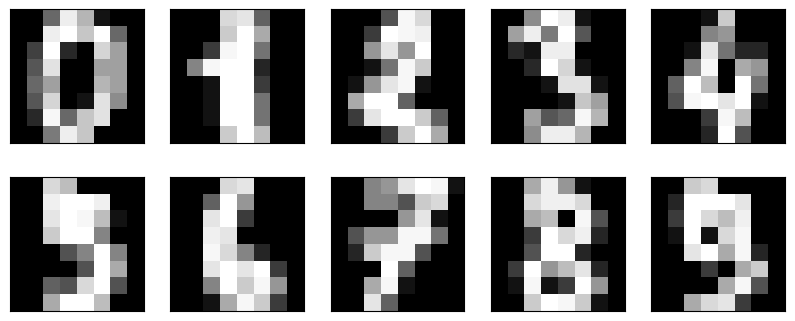

データの形状： (1797, 64)
ラベル： [0 1 2 3 4 5 6 7 8 9]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits_data = datasets.load_digits()

n_img = 10 # 表示する画像の数
plt.figure(figsize=(10, 4))

for i in range(n_img):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(digits_data.data[i].reshape(8, 8), cmap='Greys_r')
    ax.get_xaxis().set_visible(False) # 軸を非表示に
    ax.get_yaxis().set_visible(False)
plt.show()

print('データの形状：', digits_data.data.shape)
print('ラベル：', digits_data.target[:n_img])

データを訓練用とテスト用に分割

In [ ]:
import torch
from sklearn.model_selection import train_test_split

digit_images = digits_data.data
labels = digits_data.target
x_train, x_test, t_train, t_test = train_test_split(digit_images, labels) # 25%がテスト用

# Tensorに変換
x_train = torch.tensor(x_train, dtype=torch.float32)
t_train = torch.tensor(t_train, dtype=torch.int64)
x_test = torch.tensor(x_test, dtype=torch.float32)
t_test = torch.tensor(t_test, dtype=torch.int64)

モデルを構築

nnモジュールのSequentialクラスによりモデルを構築する

In [ ]:
from torch import nn

net = nn.Sequential(
    nn.Linear(64, 32), # 全結合層
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10) # 0~9の分類をするため出力は10となる
)
print(net)

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)


学習

モデルを訓練する

今回は、損失関数に交差エントロピー誤差を、最適化アルゴリズムにSGD(確率的勾配降下法)を設定する

順伝播は訓練データ、テストデータ両者で行い誤差を計算する

逆伝播を行うのは、訓練データのみ

In [ ]:
from torch import optim

# 交差エントロピー誤差関数
loss_fnc = nn.CrossEntropyLoss()

# SGD
optimizer = optim.SGD(net.parameters(), lr=0.01) # 学習率は0.01

# 損失のログ
record_loss_train = []
record_loss_test = []

# 1000エポック学習
for i in range(1000):
    # 勾配を0に
    optimizer.zero_grad()

    # 順伝播
    y_train = net(x_train)
    y_test = net(x_test)

    # 誤差を求める
    loss_train = loss_fnc(y_train, t_train)
    loss_test = loss_fnc(y_test, t_test)
    record_loss_train.append(loss_train.item())
    record_loss_test.append(loss_test.item())

    # 逆伝播(勾配を求める)
    loss_train.backward()

    # パラメータの更新
    optimizer.step()

    if i % 100 == 0:
        print('Epoch:', i, 'Loss_Train:', loss_train.item(), 'Loss_Test:', loss_test.item())

Epoch: 0 Loss_Train: 2.519376039505005 Loss_Test: 2.4164841175079346
Epoch: 100 Loss_Train: 1.115484356880188 Loss_Test: 1.1585962772369385
Epoch: 200 Loss_Train: 0.5136207342147827 Loss_Test: 0.6007373332977295
Epoch: 300 Loss_Train: 0.3060990273952484 Loss_Test: 0.4001491069793701
Epoch: 400 Loss_Train: 0.21064098179340363 Loss_Test: 0.30333393812179565
Epoch: 500 Loss_Train: 0.1610938459634781 Loss_Test: 0.25424349308013916
Epoch: 600 Loss_Train: 0.1311330646276474 Loss_Test: 0.22710195183753967
Epoch: 700 Loss_Train: 0.11102744936943054 Loss_Test: 0.2100570946931839
Epoch: 800 Loss_Train: 0.09633415192365646 Loss_Test: 0.19861185550689697
Epoch: 900 Loss_Train: 0.08503606170415878 Loss_Test: 0.1905619204044342


誤差の推移

訓練データ、テストデータで誤差の推移をグラフ化する

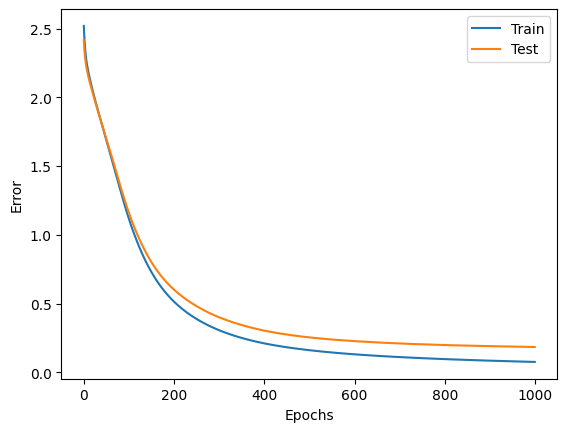

In [ ]:
plt.plot(range(len(record_loss_train)), record_loss_train, label='Train')
plt.plot(range(len(record_loss_test)), record_loss_test, label='Test')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

正解率

モデルの性能を把握するために、テストデータを使い正解率を測定する

In [ ]:
y_test = net(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print(count)
print(len(y_test))
print('正解率：', str(count/len(y_test)*100) + '%')

427
450
正解率： 94.88888888888889%


訓練済みのモデルを使った予測

訓練済みのモデルを使って画像を入力し、モデルが機能していることを確かめる

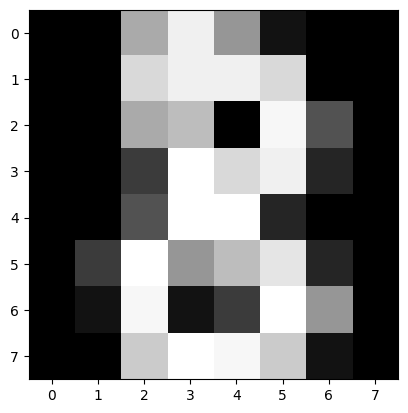

正解： 8 予測結果: 8


In [ ]:
img_id = 8
x_pred = digit_images[img_id]
image = x_pred.reshape(8, 8)
plt.imshow(image, cmap='Greys_r')
plt.show()

x_pred = torch.tensor(x_pred, dtype=torch.float32)
y_pred = net(x_pred)
print('正解：', labels[img_id], '予測結果:', y_pred.argmax().item())

# **PyTorchの様々な機能**

## **自動微分**

**Autograd(自動微分)**


*   Tensorの各要素による微分を自動で行う機能
*   演算内容と経路(計算グラフ)が保持され、順伝播の経路を遡って「勾配」が計算される
*   複雑な計算グラフであっても簡単に勾配を計算することができる



Tensorは、requires_grad属性をTrueに設定することで計算過程が記録される様になる

In [ ]:
import torch

x = torch.ones(2, 3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


Tensorの演算と自動微分

requires_grad属性がTrueであれば、演算によりgrad_fnが記録される

grad_fnは、このTensorを作った演算です

以下は、xに足し算を行って得られたyのgrad_fnを表示している

In [ ]:
y = x + 2
print(y)
print(y.grad_fn)

tensor([[3., 3., 3.],
        [3., 3., 3.]], grad_fn=<AddBackward0>)


掛け算、mean関数などの演算も、grad_fnに記録される

In [ ]:
z = y * 3
print(z)

out = z.mean()
print(out)

tensor([[9., 9., 9.],
        [9., 9., 9.]], grad_fn=<MulBackward0>)
tensor(9., grad_fn=<MeanBackward0>)


**勾配の計算**

backwardメソッドは、逆伝播により勾配を計算する

その際に、記録されている演算と経路が使用されている

以下の例では、aに2をかけてかけてbとしていますが、backwardによりaの変化に対するbの変化の割合、すなわち勾配が計算される

In [ ]:
a = torch.tensor([1.0], requires_grad=True)
b = a * 2 # bの変化量はaの2倍
b.backward() # 逆伝播
print(a.grad) # aの勾配(aの変化に対するbの変化の割合)

tensor([2.])


より複雑な経路を持つ演算でも、backwardにより勾配を計算することができます

In [ ]:
def calc(a):
    b = a*2 + 1
    c = b*b
    d = c/(c + 2)
    e = d.mean()
    return e

x = [1.0, 2.0, 3.0]
x = torch.tensor(x, requires_grad=True)
y = calc(x)
y.backward()
print(x.grad.tolist()) # xの勾配(xの各値の変化に対するyの変化の割合)

[0.06611569225788116, 0.01828990876674652, 0.007176725193858147]


cの各値付近における勾配が計算できました

勾配が正しく計算できていることを確認する

xを微小変化させて、xの微小変化に対するyの微小変化の割合を求める

In [ ]:
delta = 0.001 # xの微小変化

x = [1.0, 2.0, 3.0]
x = torch.tensor(x, requires_grad=True)
y = calc(x).item()

x_1 = [1.0+delta, 2.0, 3.0]
x_1 = torch.tensor(x_1, requires_grad=True)
y_1 = calc(x_1).item()

x_2 = [1.0, 2.0+delta, 3.0]
x_2 = torch.tensor(x_2, requires_grad=True)
y_2 = calc(x_2).item()

x_3 = [1.0, 2.0, 3.0+delta]
x_3 = torch.tensor(x_3, requires_grad=True)
y_3 = calc(x_3).item()

# 勾配の計算
grad_1 = (y_1 - y) / delta
grad_2 = (y_2 - y) / delta
grad_3 = (y_3 - y) / delta

print(grad_1, grad_2, grad_3)

0.06604194641113281 0.018298625946044922 0.007152557373046875


xの微小変化を0.001と小さい値にしましたが、yの微小変化との割合は、backwardによる計算結果とほぼ同じになる

backwardにより正しく勾配を計算できていることが確認できました

## **エポックとバッチ**

**エポック(epoch)**

*   全ての訓練(学習)データを一回学習することを、1エポックと数える
*   1エポックで、訓練データを全て使い切る

**バッチ(batch)**

*   入力と正解のペア(ここではサンプルと呼ぶ)の集合
*   バッチごとに学習が行われる
*   「バッチサイズ」はバッチに含まれるサンプルの数
*   1エポック分の訓練データは、複数のバッチに分割される





**バッチと学習方法**

バッチ学習

*   バッチサイズは訓練データの数に等しい
*   全ての訓練データを一度の学習で使い切る

オンライン学習

*   バッチサイズは1で、1エポックの学習回数は訓練データの数に等しい

ミニバッチ学習

*   訓練データを小さなサイズのバッチに分割し、バッチごとに学習する







**ミニバッチ学習の例**

訓練データのサンプル数が1000の場合

*   1000のサンプルを全て使い切ると1エポック
*   ミニバッチ学習の場合、例えばバッチサイズを50に設定すると、1エポックあたり20回学習が行われる



## **DataLoader**



*   データセットからデータをバッチサイズごとにまとめて返す
*   バッチはランダムに取得することが可能
*   データを読み込み、前処理、ミニバッチ法を簡単に実装することができる



データの読み込み

torchvision.datasetsを使って手書き文字のデータを読み込み、DataLoderを設定する

torchvision.datasetsにはMNISTの他にも様々なデータセットが用意されている

In [ ]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader

# 訓練データを取得
mnist_train = MNIST('./data',
                    train=True, download=True,
                    transform=transforms.ToTensor())

# テストデータの取得
mnist_test = MNIST('./data',
                   train=False, download=True,
                   transform=transforms.ToTensor())
print('訓練データの数：', len(mnist_train), 'テストデータの数：', len(mnist_test))

# DataLoaderの設定
img_size = 28
batch_size = 256
train_loader = DataLoader(mnist_train,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(mnist_test,
                          batch_size=batch_size,
                          shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 148744454.58it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 70142266.26it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 43331838.35it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 18899334.10it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

訓練データの数： 60000 テストデータの数： 10000


モデルの構築

今回は、nn.Moduleモジュールを継承したクラスとして、モデルを構築する

.cuda()により、モデルの計算はGPU上で行われるようになる

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(img_size*img_size, 1024) # 全結合層
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, img_size*img_size) # バッチサイズx入力の数
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
net.cuda() # GPU対応
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


学習

モデルを訓練する

DataLoaderを使い、ミニバッチを取り出して訓練及び評価を行う

1エポックの中で何度もミニバッチを使って訓練が行われるので、ミニバッチ法が実装されていることになる

In [ ]:
from torch import optim
import time

# 交差エントロピー誤差関数
loss_fnc = nn.CrossEntropyLoss()

# SGD
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 損失関数
record_loss_train = []
record_loss_test = []

# 学習
for i in range(10): # 10エポック学習
    net.train() # 訓練モード
    loss_train = 0
    for j, (x, t) in enumerate(train_loader): # ミニバッチ(x, t)を取り出す
        x, t = x.cuda(), t.cuda() # GPU対応
        y = net(x)
        loss = loss_fnc(y, t)
        loss_train += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_train /= j+1
    record_loss_train.append(loss_train)

    net.eval() # 評価モード
    loss_test = 0
    for j, (x, t) in enumerate(test_loader): # ミニバッチ(x, t)を取り出す
        x, t = x.cuda(), t.cuda() # GPU対応
        y = net(x)
        loss = loss_fnc(y, t)
        loss_test += loss.item()
    loss_test /= j+1
    record_loss_test.append(loss_test)

    if i % 1 == 0:
        print('Epoch:', i, 'Loss_Train:', loss_train, 'Loss_Test:', loss_test)

Epoch: 0 Loss_Train: 2.2193265214879463 Loss_Test: 2.0964136898517607
Epoch: 1 Loss_Train: 1.8359672576823134 Loss_Test: 1.4513470619916915
Epoch: 2 Loss_Train: 1.1214571549537333 Loss_Test: 0.8309093475341797
Epoch: 3 Loss_Train: 0.7228957335999672 Loss_Test: 0.5995000131428242
Epoch: 4 Loss_Train: 0.5646989718396613 Loss_Test: 0.4946844562888145
Epoch: 5 Loss_Train: 0.4856303133863084 Loss_Test: 0.4365241900086403
Epoch: 6 Loss_Train: 0.4380945626725542 Loss_Test: 0.39858580343425276
Epoch: 7 Loss_Train: 0.40587723001520687 Loss_Test: 0.37190169766545295
Epoch: 8 Loss_Train: 0.38244466287024476 Loss_Test: 0.35209347018972037
Epoch: 9 Loss_Train: 0.36479106177674964 Loss_Test: 0.3370453060604632


誤差の推移

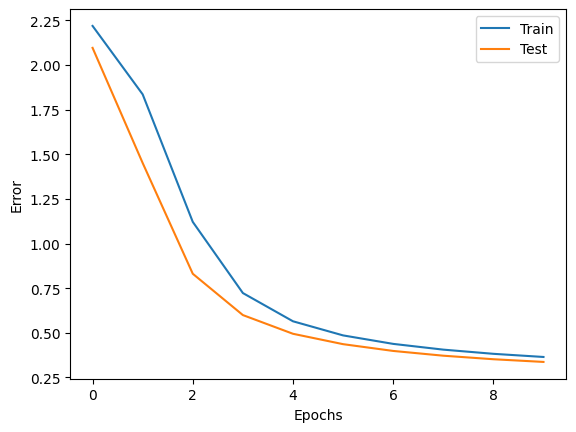

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(record_loss_train)), record_loss_train, label='Train')
plt.plot(range(len(record_loss_test)), record_loss_test, label='Test')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

**正解率**

モデルの性能を把握するため、テストデータを使い正解率を測定する

In [ ]:
correct = 0
total = 0
for i, (x, t) in enumerate(test_loader):
    x, t = x.cuda(), t.cuda()
    x = x.view(-1, img_size*img_size)
    y = net(x)
    correct += (y.argmax(1) == t).sum().item()
    total += len(x)
print('正解率:', str(correct/total*100) + '%')

正解率: 90.32%


# **畳み込みニューラルネットワーク(CNN)**

## **CNNの概要**

*   画像を入力とし、畳み込み層→プーリング層→全結合層
*   出力は各グループに分類される確率となる



1.   **畳み込み**

*   畳み込み層では、フィルタを用いて画像の特徴の抽出が行われる
*   フィルタの格値は学習により最適化される
*   出力画像のチャンネル数は、フィルタの数に等しくなる


2.   **プーリング層**

*   入力画像の各領域を代表する値(最大値:MAXプーリング)を取り出して、出力画像は圧縮したもの端的に表したもの
*   出力は、位置の微小なずれが吸収された、本質的な特徴を表す画像となっている

3.   **パディング**

*   入力画像の周囲を0などの値で囲む(0パディング)圧縮をしているので画像サイズが小さくならない様な処理をしている
*   端の特徴も捉えることができる様になる

4.   **ストライド**

*   フィルタの特徴の抽出をどれくらいずらして行うか設定すること、基本1ずつ、プーリングではそれより大きくずらすこともある


## **データ拡張とは**



*   過学習は狭い範囲のデータにモデルが最適化されてしまい、モデルが汎用性を失ってしまうこと
*   訓練データ内のサンプル数が少ないと、過学習が起きやすい
*   データ拡張ではデータに何かしらの加工を加えることで、データを「水増し」することにより過学習を抑制する



ex)
*   画像の回転
*   画像の拡大縮小
*   画像を上下左右にシフト
*   画像を上下左右に反転
*   画像の一部を隠す→モデルの性能が上がる
*   etc...

訓練データの水増しを行う




## **ドロップアウト**



*   出力層以外のニューロンを一定の確率でランダムに消去するテクニック
*   実装が容易でありながら、過学習を大きく抑制できる
*   消去されるニューロンは、バッチごとに入れ替わる



## **CNNの実装**

torchbision.datasetsを使い、CIFAR-10を読み込む

CIFARは、約6万枚の画像にラベルをつけたデータセットです

Files already downloaded and verified
データの数： 10000


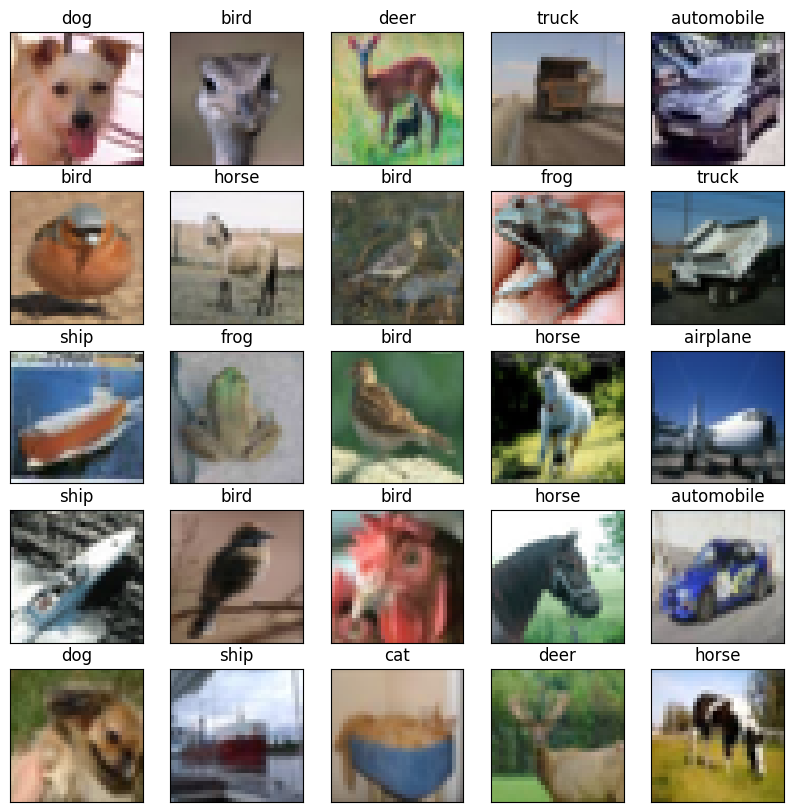

In [4]:
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

cifar10_data = CIFAR10(root='./data',
                       train=False, download=True,
                       transform=transforms.ToTensor())
cifar10_classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer',
                            'dog', 'frog', 'horse', 'ship', 'truck'])

print('データの数：', len(cifar10_data))

n_image = 25 # 表示する画像の数
cifar10_loader = DataLoader(cifar10_data, batch_size=n_image, shuffle=True)
dataiter = iter(cifar10_loader) # イテレータ
images, labels = next(iter(dataiter)) # 最初のバッチを取り出す

plt.figure(figsize=(10, 10)) # 画像の表示サイズ
for i in range(n_image):
    plt.subplot(5, 5, i+1)
    plt.imshow(np.transpose(images[i], (1, 2, 0))) # チャンネルを一番後ろに
    label = cifar10_classes[labels[i]]
    plt.title(label)
    plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False) # ラベルとメモリを非表示に
plt.show()

**データ拡張**

torchvision.transformsを使ってデータ拡張を行う

今回は、cifar-10の画像に-30~30度の回転、および0.8~1.2倍のリサイズを行う

これらの処理は、バッチを取り出す際に元の画像に対してランダムに加えられる

Files already downloaded and verified
データの数： 10000


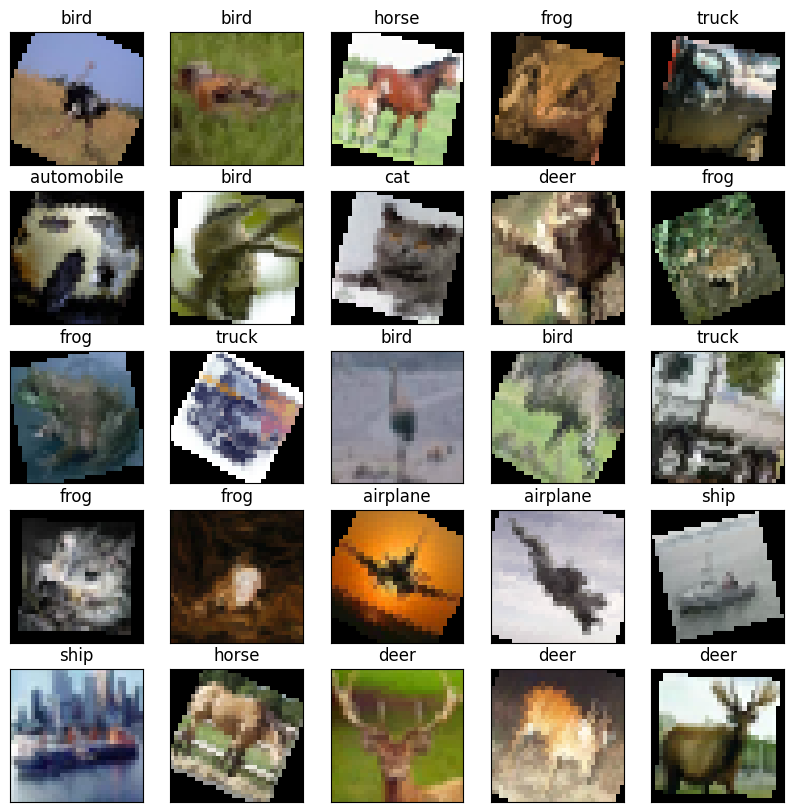

In [5]:
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.RandomAffine([-30, 30], scale=(0.8, 1.2)), # 回転とリサイズ
                                transforms.ToTensor()])

cifar10_data = CIFAR10(root='./data',
                       train=False, download=True,
                       transform=transform)
cifar10_classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer',
                            'dog', 'frog', 'horse', 'ship', 'truck'])

print('データの数：', len(cifar10_data))

n_image = 25 # 表示する画像の数
cifar10_loader = DataLoader(cifar10_data, batch_size=n_image, shuffle=True)
dataiter = iter(cifar10_loader) # イテレータ
images, labels = next(iter(dataiter)) # 最初のバッチを取り出す

plt.figure(figsize=(10, 10)) # 画像の表示サイズ
for i in range(n_image):
    plt.subplot(5, 5, i+1)
    plt.imshow(np.transpose(images[i], (1, 2, 0))) # チャンネルを一番後ろに
    label = cifar10_classes[labels[i]]
    plt.title(label)
    plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False) # ラベルとメモリを非表示に
plt.show()

**データの前処理**

データ拡張として、回転とリサイズ、および左右反転を行う

また、学習が効率的になる様に入力の平均値を0, 標準偏差を1にする(標準化)

DataLoaderは、訓練データ、テストデータそれぞれで設定しますが、テストデータにはミニバッチ法を適用しないのでバッチサイズは元データのサンプル数にする

In [6]:
from torchvision.datasets import CIFAR10
import torchvision.transforms as tarnsforms
from torch.utils.data import DataLoader

affine = transforms.RandomAffine([-15, 15], scale=(0.8, 1.2)) # 回転とリサイズ
flip = transforms.RandomHorizontalFlip(p=0.5) # 左右反転
normalize = transforms.Normalize((0.0, 0.0, 0.0), (1.0, 1.0, 1.0)) # 平均値を0,標準偏差を1に
to_tensor = transforms.ToTensor()

transform_train = transforms.Compose([affine, flip, to_tensor, normalize])
transform_test = transforms.Compose([to_tensor, normalize])
cifar10_train = CIFAR10('./data', train=True, download=True, transform=transform_train)
cifar10_test = CIFAR10('./data', train=False, download=True, transform=transform_test)

# DataLoaderの設定
batch_size = 64
train_loader = DataLoader(cifar10_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(cifar10_test, batch_size=len(cifar10_test), shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


**モデルの構築**

nn.Moduleモジュールを継承したクラスとして、モデルを構築する

今夏は、過学習を抑制するためにドロップアウトを導入している

In [12]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # 畳み込み層(入力チャンネル数、フィルタ数、フィルタサイズ)
        self.pool = nn.MaxPool2d(2, 2) # プーリング層(領域の数、ストライド)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 256) # 全結合層
        self.dropout = nn.Dropout(p=0.5) # ドロップ嘔吐(p=ドロップアウト率)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

net = Net()
net.cuda() # GPU対応
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=256, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


**学習**

モデルを訓練します

DataLoaderを使い、ミニバッチを取り出して訓練および評価を行う

今回は、評価時にミニバッチ法はつかわず、テストデータ全体を使って一度に誤差を計算する

In [15]:
from torch import optim

# 交差エントロピー誤差関数
loss_fnc = nn.CrossEntropyLoss()

# 最適化アルゴリズム
optimizer = optim.Adam(net.parameters())

# 損失のログ
record_loss_train = []
record_loss_test = []

# 学習
x_test, t_test = next(iter(test_loader))
x_test, t_test = x_test.cuda(), t_test.cuda()

# 20エポック学習
for i in range(20):
    net.train() # 訓練モード
    loss_train = 0
    for j, (x, t) in enumerate(train_loader): # ミニバッチ(x, t)を取り出す
        x, t = x.cuda(), t.cuda()
        y = net(x)
        loss = loss_fnc(y, t)
        loss_train += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss_train /= j+1
    record_loss_train.append(loss_train)

    net.eval() # 評価モード
    y_test = net(x_test)
    loss_test = loss_fnc(y_test, t_test).item()
    record_loss_test.append(loss_test)

    if i % 1 == 0:
        print('Epoch:', i, 'Loss_Train:', loss_train, 'Loss_Test:', loss_test)

Epoch: 0 Loss_Train: 1.5703875373696428 Loss_Test: 1.4170105457305908
Epoch: 1 Loss_Train: 1.482780515995172 Loss_Test: 1.3493543863296509
Epoch: 2 Loss_Train: 1.4345212578773499 Loss_Test: 1.3086491823196411
Epoch: 3 Loss_Train: 1.3968636338668101 Loss_Test: 1.2840492725372314
Epoch: 4 Loss_Train: 1.3703022316441207 Loss_Test: 1.2319204807281494
Epoch: 5 Loss_Train: 1.345841543982401 Loss_Test: 1.251266360282898
Epoch: 6 Loss_Train: 1.3219021058753324 Loss_Test: 1.1863775253295898
Epoch: 7 Loss_Train: 1.3093596219711596 Loss_Test: 1.1735763549804688
Epoch: 8 Loss_Train: 1.2936696852259624 Loss_Test: 1.1642042398452759
Epoch: 9 Loss_Train: 1.2749869340216107 Loss_Test: 1.1592638492584229
Epoch: 10 Loss_Train: 1.2691105691825642 Loss_Test: 1.1422451734542847
Epoch: 11 Loss_Train: 1.251303753584547 Loss_Test: 1.12080979347229
Epoch: 12 Loss_Train: 1.2494922940383482 Loss_Test: 1.1191655397415161
Epoch: 13 Loss_Train: 1.2342920281240701 Loss_Test: 1.1212319135665894
Epoch: 14 Loss_Train: 

**誤差の推移**

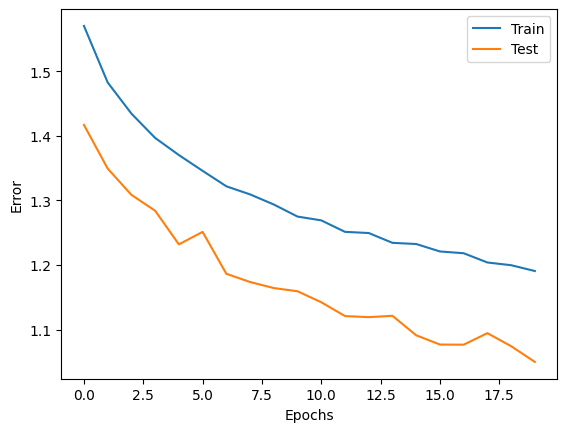

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(len(record_loss_train)), record_loss_train, label='Train')
plt.plot(range(len(record_loss_test)), record_loss_test, label='Test')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

**正解率**

In [19]:
correct = 0
total = 0
net.eval() # 評価モード
for i, (x, t) in enumerate(test_loader):
    x, t = x.cuda(), t.cuda()
    y = net(x)
    correct += (y.argmax(1) == t).sum().item()
    total += len(x)
print('正解率：', str(correct/total*100) + '%')

正解率： 62.94%


**訓練済みのモデルを使った予測**

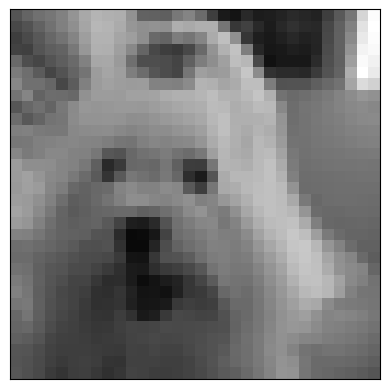

正解： dog 予測結果： dog


In [22]:
cifar10_loader = DataLoader(cifar10_test, batch_size=1, shuffle=True)
dataiter = iter(cifar10_loader)
images, labels = next(dataiter) # サンプルの1つだけ取り出す

plt.imshow(np.transpose(images[0], (1, 2, 0))) # チャンネルを一番後ろに
plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)  # ラベルとメモリを非表示
plt.show()

net.eval()
x, t = images.cuda(), labels.cuda()
y = net(x)
print('正解：', cifar10_classes[labels[0]],
      '予測結果：', cifar10_classes[y.argmax().item()])

# **再帰型ニューラルネットワーク(RNN)**

### **RNNの概要**